In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/content/insurance_claims 1.csv',na_values=['?','nan'])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-14,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-15,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-06,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-15,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-00,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-15,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-90,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-15,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-14,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-15,Vehicle Theft,NaN,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [5]:
col = df.select_dtypes(include='object').columns
col

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [6]:
for i in col:
  print(i ,':',df[i].value_counts())

policy_bind_date : policy_bind_date
01-01-06    3
28-04-92    3
05-08-92    3
14-12-91    2
09-08-04    2
           ..
03-06-14    1
12-12-98    1
18-02-99    1
30-10-97    1
11-11-96    1
Name: count, Length: 951, dtype: int64
policy_state : policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
policy_csl : policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64
insured_sex : insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level : insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation : insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical        

<Axes: ylabel='count'>

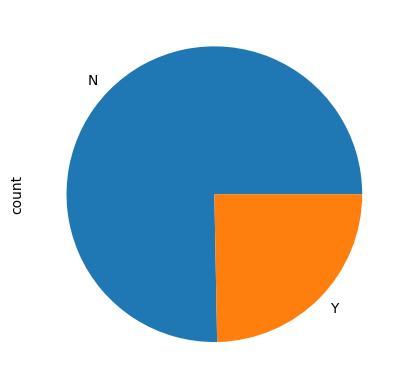

In [7]:
df['fraud_reported'].value_counts().plot(kind='pie')

In [8]:
df.drop('_c39',axis = 1,inplace = True)

In [9]:
df[['collision_type','authorities_contacted','property_damage','police_report_available']].isna().sum()

,0
collision_type,178
authorities_contacted,91
property_damage,360
police_report_available,343


In [10]:
df['collision_type'].value_counts()

,count
collision_type,
Rear Collision,292
Side Collision,276
Front Collision,254


In [11]:
df['authorities_contacted'].value_counts()

,count
authorities_contacted,
Police,292
Fire,223
Other,198
Ambulance,196


In [ ]:
df['property_damage'].value_counts()

,count
property_damage,
NO,338
YES,302


In [ ]:
df['police_report_available'].value_counts()

,count
police_report_available,
NO,343
YES,314


In [12]:
df['collision_type'].fillna('Rear Collision',inplace = True)
df['authorities_contacted'].fillna('Police',inplace = True)
df['property_damage'].fillna('NO',inplace = True)
df['police_report_available'].fillna('NO',inplace = True)

In [13]:
df.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
for i in col:
  df[i] = le.fit_transform(df[i])

In [16]:
df.head(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,2,0,3,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,820,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,1,1,3,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,185,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,1,1,3,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0


In [39]:
y = df['fraud_reported']
X = df.drop(['fraud_reported'],axis =1)

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 38)
(302, 38)
(1204,)
(302,)


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
rf.score(X_train,y_train)

1.0

In [31]:
rf.score(X_test,y_test)

0.8443708609271523

<Axes: >

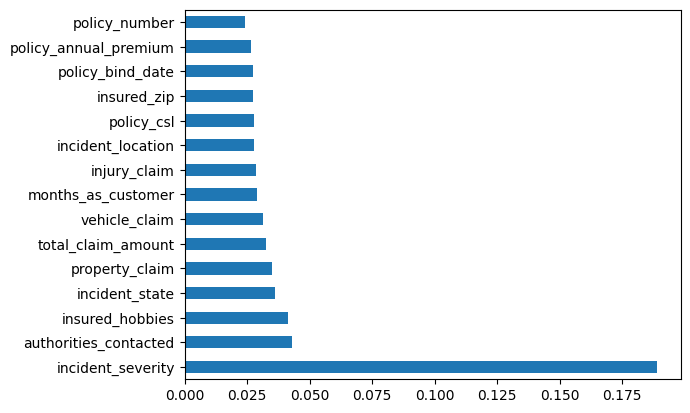

In [32]:
feat=pd.Series(rf.feature_importances_,index =X.columns)
feat.nlargest(15).plot(kind='barh')

##Modeling building using importance features

In [43]:
y

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
1501,1
1502,1
1503,1
1504,1


In [44]:
X =X[['incident_severity','authorities_contacted','insured_hobbies','property_claim','total_claim_amount','vehicle_claim']]

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1204, 6)
(302, 6)
(1204,)
(302,)


In [46]:
from sklearn.ensemble import RandomForestClassifier
rf  = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
print(rf.score(X_test,y_test))
print(rf.score(X_train,y_train))

0.8377483443708609
1.0


In [48]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
print(xgb.score(X_test,y_test))
print(xgb.score(X_train,y_train))

0.8443708609271523
0.9983388704318937


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

In [51]:
# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [52]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy: 0.8679253112033194


In [55]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [56]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)
print("Accurarcy on train set:",best_model.score(X_train,y_train))

Accuracy on test set: 0.8609271523178808
Accurarcy on train set: 0.8995016611295681


In [58]:
print(confusion_matrix(y_test,y_pred))

[[124  30]
 [ 12 136]]


In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       154
           1       0.82      0.92      0.87       148

    accuracy                           0.86       302
   macro avg       0.87      0.86      0.86       302
weighted avg       0.87      0.86      0.86       302



##Saving the model

In [61]:
import pickle
# After GridSearchCV is completed:

# 1. Extract the best model
best_model = grid_search.best_estimator_

# 2. Extract the best parameters
best_params = grid_search.best_params_

# 3. Extract the best score
best_score = grid_search.best_score_

# Save the best model, parameters, and score to a pickle file
with open('grid_search_results.pkl', 'wb') as file:
    pickle.dump((best_model, best_params, best_score), file)

In [62]:
import pickle

# Load the saved model and results
with open('grid_search_results.pkl', 'rb') as file:
    best_model, best_params, best_score = pickle.load(file)

# Use the loaded model for predictions or further analysis
y_pred = best_model.predict(X_test)

In [63]:
best_model.score(X_test,y_test)

0.8609271523178808